# Introduction

Throughout my data science journey, I have learned that it is a good practice to understand the data first and try to gather as many insights from it. Exploratory Data Analysis (EDA) is all about making sense of data in hand, before getting dirty with machine learning and sophiticated algorithm. 

While there are plenty of Python libraries that can help create beautiful and complex visualizations, I often find myself starting with the most simplistic analyses: count plot, histogram, scatter plot, boxplot, etc. This initial EDA workflow is very similar for each new data set. But unfortunately, they are tedious. Converting to correct data types, selecting the right variable type for the right plot, itterate through all possible variable combinations, adjusting plot asthetic and labels, etc. These are the tasks I would love to do... once. As someone that does not find great joy in completing repetitive tasks, I set out to build a tool that allow me to me as lazy as possible.

# Description
Auto_EDA is a python library that automates common tasks in your exploratory data analysis. This includes missing values visualization, missing values handling, variable types handling, predictive modeling and a variety of univariate and bivariate graphs. The goal is to provide a fast and effective tool for discovering insights, so you can quickly move on machine learning model.


# Table of Contents

## Descriptive Statistics

###  Dataset Overview

1. Number of variables

2. Number of observations

3. Memory usage

## Missing Values

1. Visualize missing values using heatmap

2. Suggestions for handling missing value

## Variable Types

1. Print out current data types from Pandas

2. Type conversion suggestions: 

 * String datetime -> datetime
 
 * Small interger (for example: boolean)  -> categorical type
 
 * String float -> float
 
 * Maximum cardinality (number of unique == number of observations) -> remove

## Visualization

### Univariate plots

1. Histogram (for numerical data)

2. Count plot (for categorical data)

3. World cloud (for text data)

### Bivariate plots 

User can specify a categorical column for grouping. 

1. Correlation plots (heat map and scatter plot): for numerical and numerical data
    * Principal Component Analysis

2. Box plots: for numerical and categorical data

3. Relative frequency plots: for categorical and categorical data
    * Correspondence Analysis

4. Trend plot (connected scatterplot): if timeseries data is present


### Statistical Modeling

User can specify a target variable for classification/regression task using Classification And Regression Tree (CART).

1. Classification Report (train on 75% of data, test on 25%)

2. Bar chart of relative feature importance

3. Decision tree visualization with Dtreeviz



In [1]:
from auto_eda import *

In [2]:
# Example dataset: air quality
# Testing datetime format and missing data handling
air_quality = pd.read_csv('datasets/AirQualityUCI_req.csv')
air_quality['Datetime'] = air_quality['Date'] + " " + air_quality['Time']
del air_quality['Date'], air_quality['Time']
air_quality['text_number'] = '3'
air_quality.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6         1360       150      11.9           1046      166   
1     2.0         1292       112       9.4            955      103   
2     2.2         1402        88       9.0            939      131   
3     2.2         1376        80       9.2            948      172   
4     1.6         1272        51       6.5            836      131   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
0          1056      113          1692         1268  13.6  48.9  0.7578   
1          1174       92          1559          972  13.3  47.7  0.7255   
2          1140      114          1555         1074  11.9  54.0  0.7502   
3          1092      122          1584         1203  11.0  60.0  0.7867   
4          1205      116          1490         1110  11.2  59.6  0.7888   

              Datetime text_number  
0  10/03/2004 18:00:00           3  
1  10/03/2004 19:00:00           3  
2  10/03/2004 20:00:00           3  
3  10/03/2004 21:00:00           3  
4  10/03/2004 22:00:00           3

In [3]:
# Example dataset: Adult Income
# Test: categorical data
income = pd.read_csv('datasets/adult.csv')
income

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]

In [4]:
# Example dataset: Adult Income
# Test: categorical data
diabetes = pd.read_csv('datasets/diabetes.csv')
diabetes['Outcome'] = np.where(diabetes['Outcome'] == 1, 'Heart Disease', 'No Heart Disease')
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age           Outcome  
0                     0.627   50     Heart Disease  
1                     0.351   31  No Heart Disease  
2                     0.672   32     Heart Disease  
3                     0.167   21  No Heart Disease  
4                     2.288   33     Heart Disease

In [5]:
# Example dataset: mtcars
# Test: categorical data
mtcars = pd.read_csv('datasets/mtcars.csv')

# Example dataset: edible mushroom classification
# Test: categorical data
mushroom = pd.read_csv('datasets/mushroom.csv')

# Example dataset: Heart Disease 
# Test: categorical data + numerical data
heart = pd.read_csv('datasets/heart.csv')
heart['target'] = np.where(heart['target'] == 1, 'has disease', 'no disease')

# Example dataset: California Housing 
# Test: regression
housing = pd.read_csv('datasets/housing.csv')

# Test: most
titanic = pd.read_csv('datasets/titanic.csv')
titanic['survived'] = np.where(titanic['survived'] == 1, 'survived', 'not-survived')
titanic.head()

pclass      survived                                             name  \
0       1      survived                    Allen, Miss. Elisabeth Walton   
1       1      survived                   Allison, Master. Hudson Trevor   
2       1  not-survived                     Allison, Miss. Helen Loraine   
3       1  not-survived             Allison, Mr. Hudson Joshua Creighton   
4       1  not-survived  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   

      sex     age  sibsp  parch  ticket      fare    cabin embarked boat body  \
0  female      29      0      0   24160  211.3375       B5        S    2    ?   
1    male  0.9167      1      2  113781    151.55  C22 C26        S   11    ?   
2  female       2      1      2  113781    151.55  C22 C26        S    ?    ?   
3    male      30      1      2  113781    151.55  C22 C26        S    ?  135   
4  female      25      1      2  113781    151.55  C22 C26        S    ?    ?   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

## Dataset Overview



In [6]:
report = auto_eda(air_quality)

In [7]:
report.get_samples()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0        2.6         1360       150      11.9           1046      166   
1        2.0         1292       112       9.4            955      103   
2        2.2         1402        88       9.0            939      131   
2973     1.3          933      -200       6.4            831      105   
3396  -200.0          894      -200       4.9            761       36   
4372     2.6         1226      -200      14.6           1138      307   
9354     2.4         1142      -200      12.4           1063      293   
9355     2.1         1003      -200       9.5            961      235   
9356     2.2         1071      -200      11.9           1047      265   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
0             1056      113          1692         1268  13.6  48.9  0.7578   
1             1174       92          1559          972  13.3  47.7  0.7255   
2             1140      114          1555         1074  11.9  54.0  0.7502   
2973           888       72          1514          710  26.0  34.9  1.1509   
3396           862       48          1504          768  23.0  49.9  1.3849   
4372           862      146          1481         1419  25.1  32.3  1.0131   
9354           603      175          1241         1092  26.9  18.3  0.6406   
9355           702      156          1041          770  28.3  13.5  0.5139   
9356           654      168          1129          816  28.5  13.1  0.5028   

                 Datetime text_number  
0     10/03/2004 18:00:00           3  
1     10/03/2004 19:00:00           3  
2     10/03/2004 20:00:00           3  
2973  12/07/2004 15:00:00           3  
3396  30/07/2004 06:00:00           3  
4372  08/09/2004 22:00:00           3  
9354  04/04/2005 12:00:00           3  
9355  04/04/2005 13:00:00           3  
9356  04/04/2005 14:00:00           3

In [8]:
report.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   int64  
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   int64  
 5   NOx(GT)        9357 non-null   int64  
 6   PT08.S3(NOx)   9357 non-null   int64  
 7   NO2(GT)        9357 non-null   int64  
 8   PT08.S4(NO2)   9357 non-null   int64  
 9   PT08.S5(O3)    9357 non-null   int64  
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
 13  Datetime       9357 non-null   object 
 14  text_number    9357 non-null   object 
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [9]:
report.get_overview()

Number of Variables: 9357
Number of Observations: 15
Memory Usage: 2.30195 Mb


## Missing Values

<Figure size 432x288 with 0 Axes>

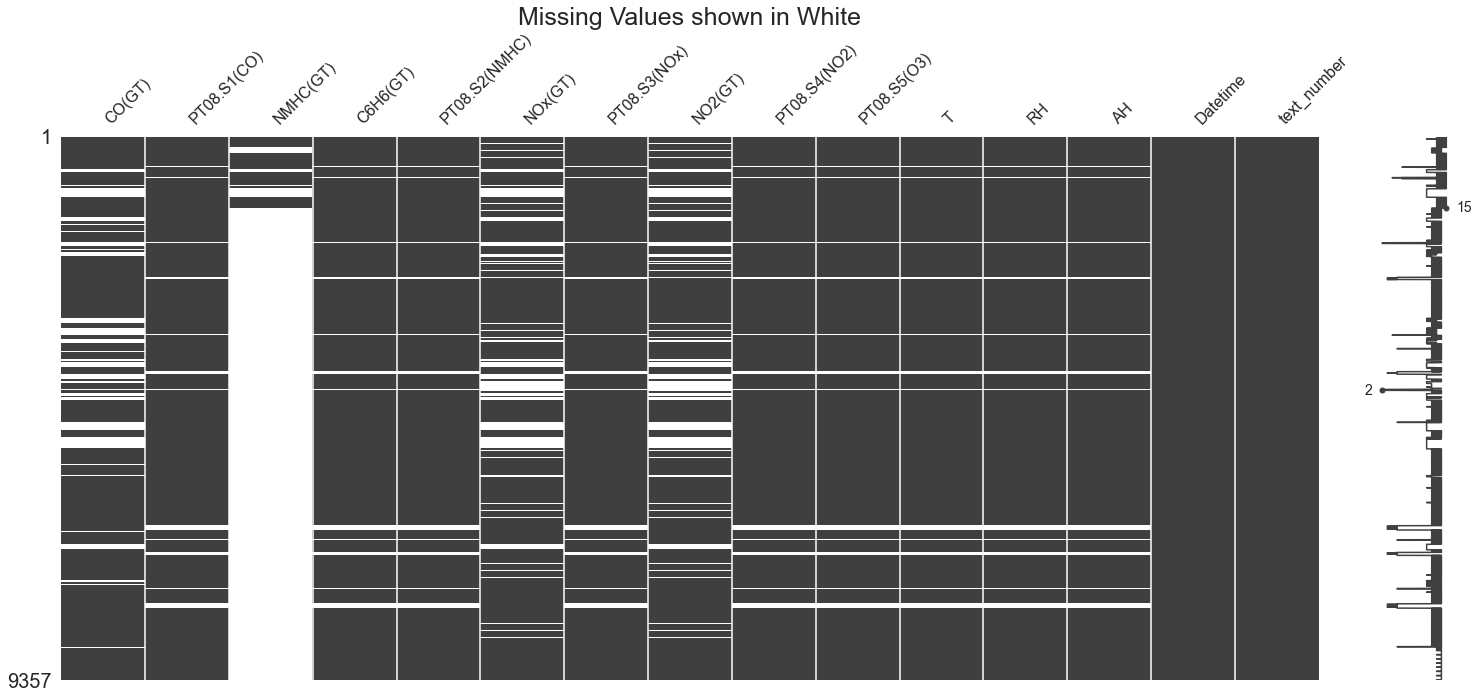

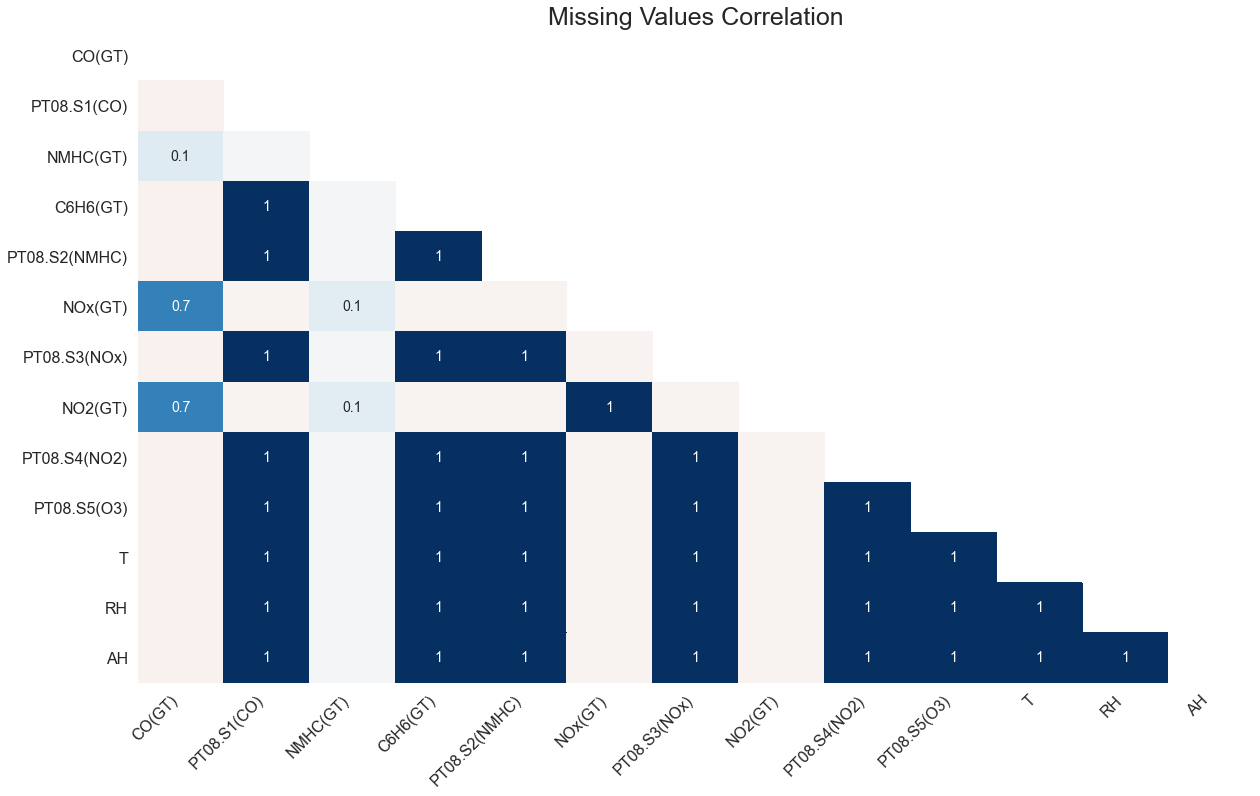

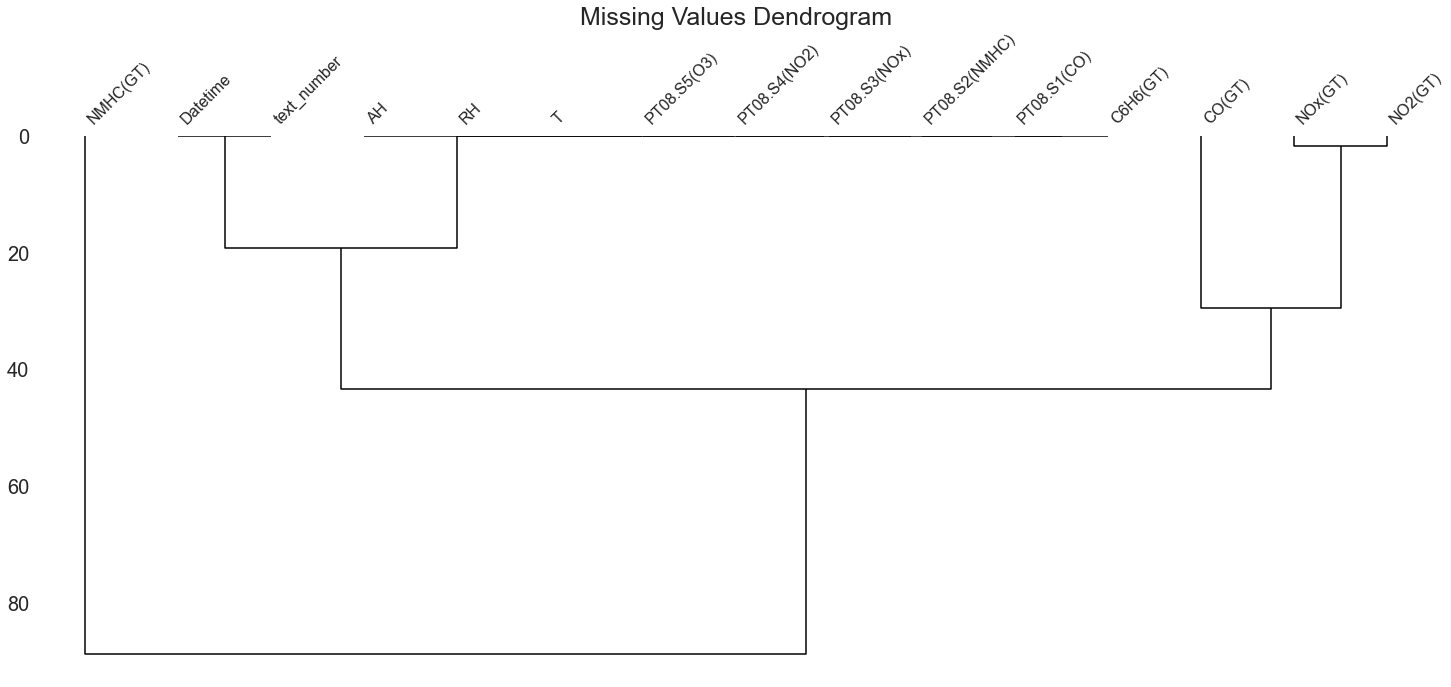

In [10]:
report.get_missings(missing_tag=-200)

In [11]:
report.handle_missings(strategy = 'deletion', drop_threshold = 0.5)

Dropped columns: ['NMHC(GT)']
Number of dropped rows: 2416 --> 25.8% of rows removed


In [12]:
report.get_missings()

There is no missing value, please check if the missings have been encoded with non-NAN value.
Use argument missing_tag for encoded missing values


## Variable Types

In [13]:
report.check_data_type()

Column     Type  Cardinality           Warning Is_datetime  \
0          CO(GT)  float64           94              None          no   
1     PT08.S1(CO)  float64         1016              None          no   
2        C6H6(GT)  float64          392              None          no   
3   PT08.S2(NMHC)  float64         1189              None          no   
4         NOx(GT)  float64          896              None          no   
5    PT08.S3(NOx)  float64         1129              None          no   
6         NO2(GT)  float64          274              None          no   
7    PT08.S4(NO2)  float64         1543              None          no   
8     PT08.S5(O3)  float64         1693              None          no   
9               T  float64          428              None          no   
10             RH  float64          742              None          no   
11             AH  float64         5460  high_cardinality          no   
12       Datetime   object         6941  high_cardinality         yes   
13    text_number   object            1    no_cardinality          no   

   String_number               Suggest  
0            yes                  None  
1            yes                  None  
2            yes                  None  
3            yes                  None  
4            yes                  None  
5            yes                  None  
6            yes                  None  
7            yes                  None  
8            yes                  None  
9            yes                  None  
10           yes                  None  
11           yes                  None  
12            no  converts to datetime  
13           yes                  None

In [14]:
report.change_data_type()

Column Datetime converts to datetime


In [15]:
report.check_data_type()

Column            Type  Cardinality           Warning Is_datetime  \
0          CO(GT)         float64           94              None          no   
1     PT08.S1(CO)         float64         1016              None          no   
2        C6H6(GT)         float64          392              None          no   
3   PT08.S2(NMHC)         float64         1189              None          no   
4         NOx(GT)         float64          896              None          no   
5    PT08.S3(NOx)         float64         1129              None          no   
6         NO2(GT)         float64          274              None          no   
7    PT08.S4(NO2)         float64         1543              None          no   
8     PT08.S5(O3)         float64         1693              None          no   
9               T         float64          428              None          no   
10             RH         float64          742              None          no   
11             AH         float64         5460  high_cardinality          no   
12       Datetime  datetime64[ns]         6941  high_cardinality         yes   
13    text_number          object            1    no_cardinality          no   

   String_number Suggest  
0            yes    None  
1            yes    None  
2            yes    None  
3            yes    None  
4            yes    None  
5            yes    None  
6            yes    None  
7            yes    None  
8            yes    None  
9            yes    None  
10           yes    None  
11           yes    None  
12            no    None  
13           yes    None

## Visualization

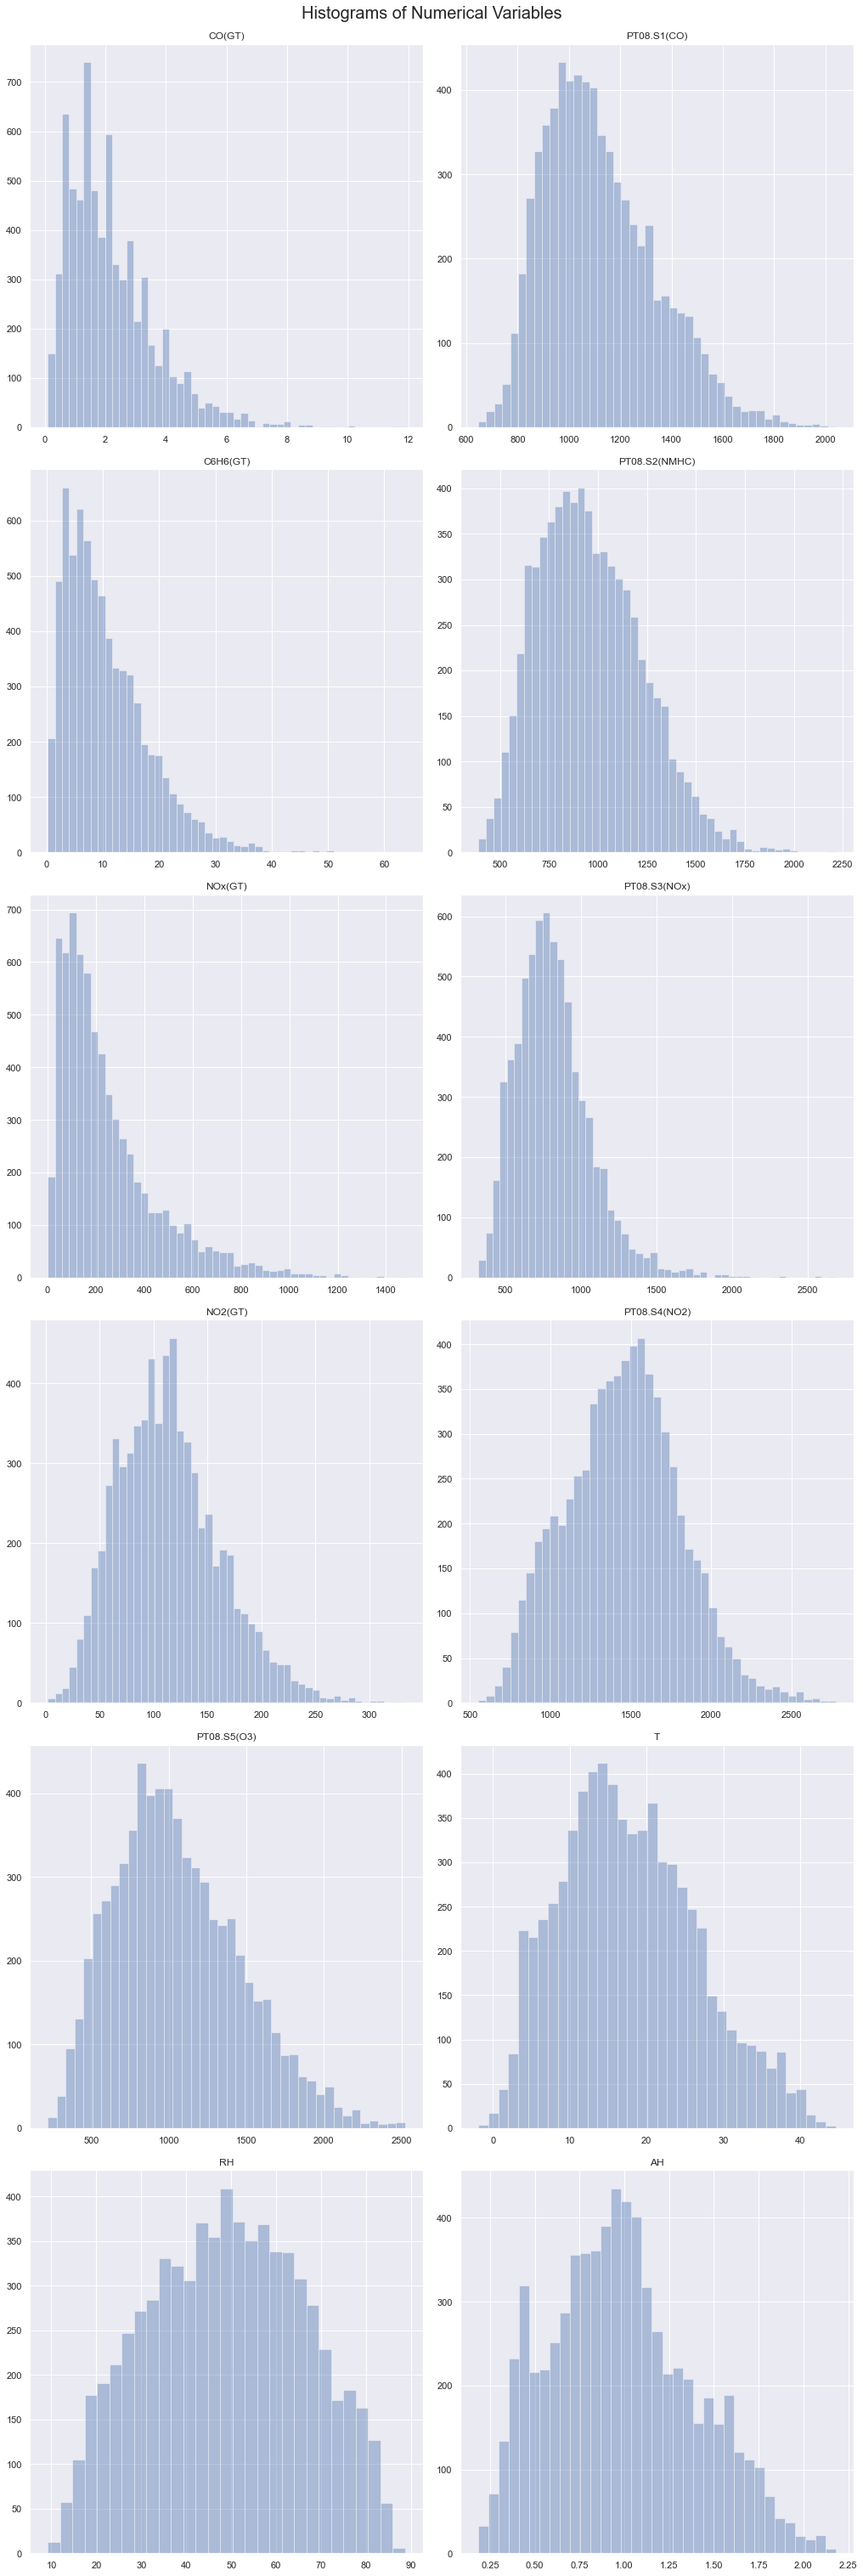

In [16]:
report.histogram()
# plt.savefig("histogram.png")

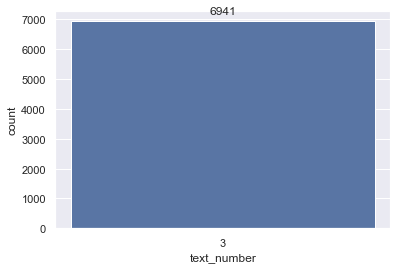

In [17]:
report.count_plots()

# plt.savefig("count_plots.png")

## Bivariate plots

### Correlation Plots

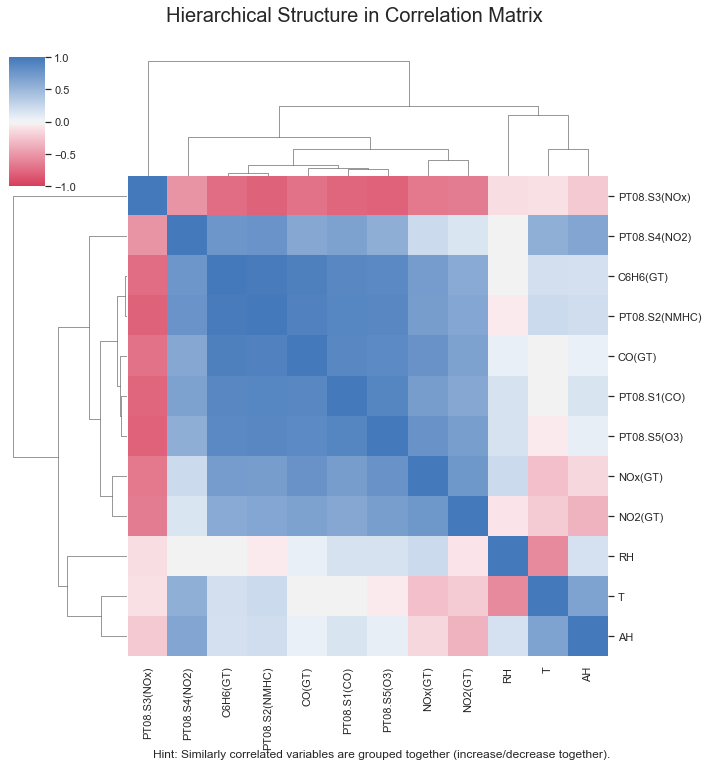

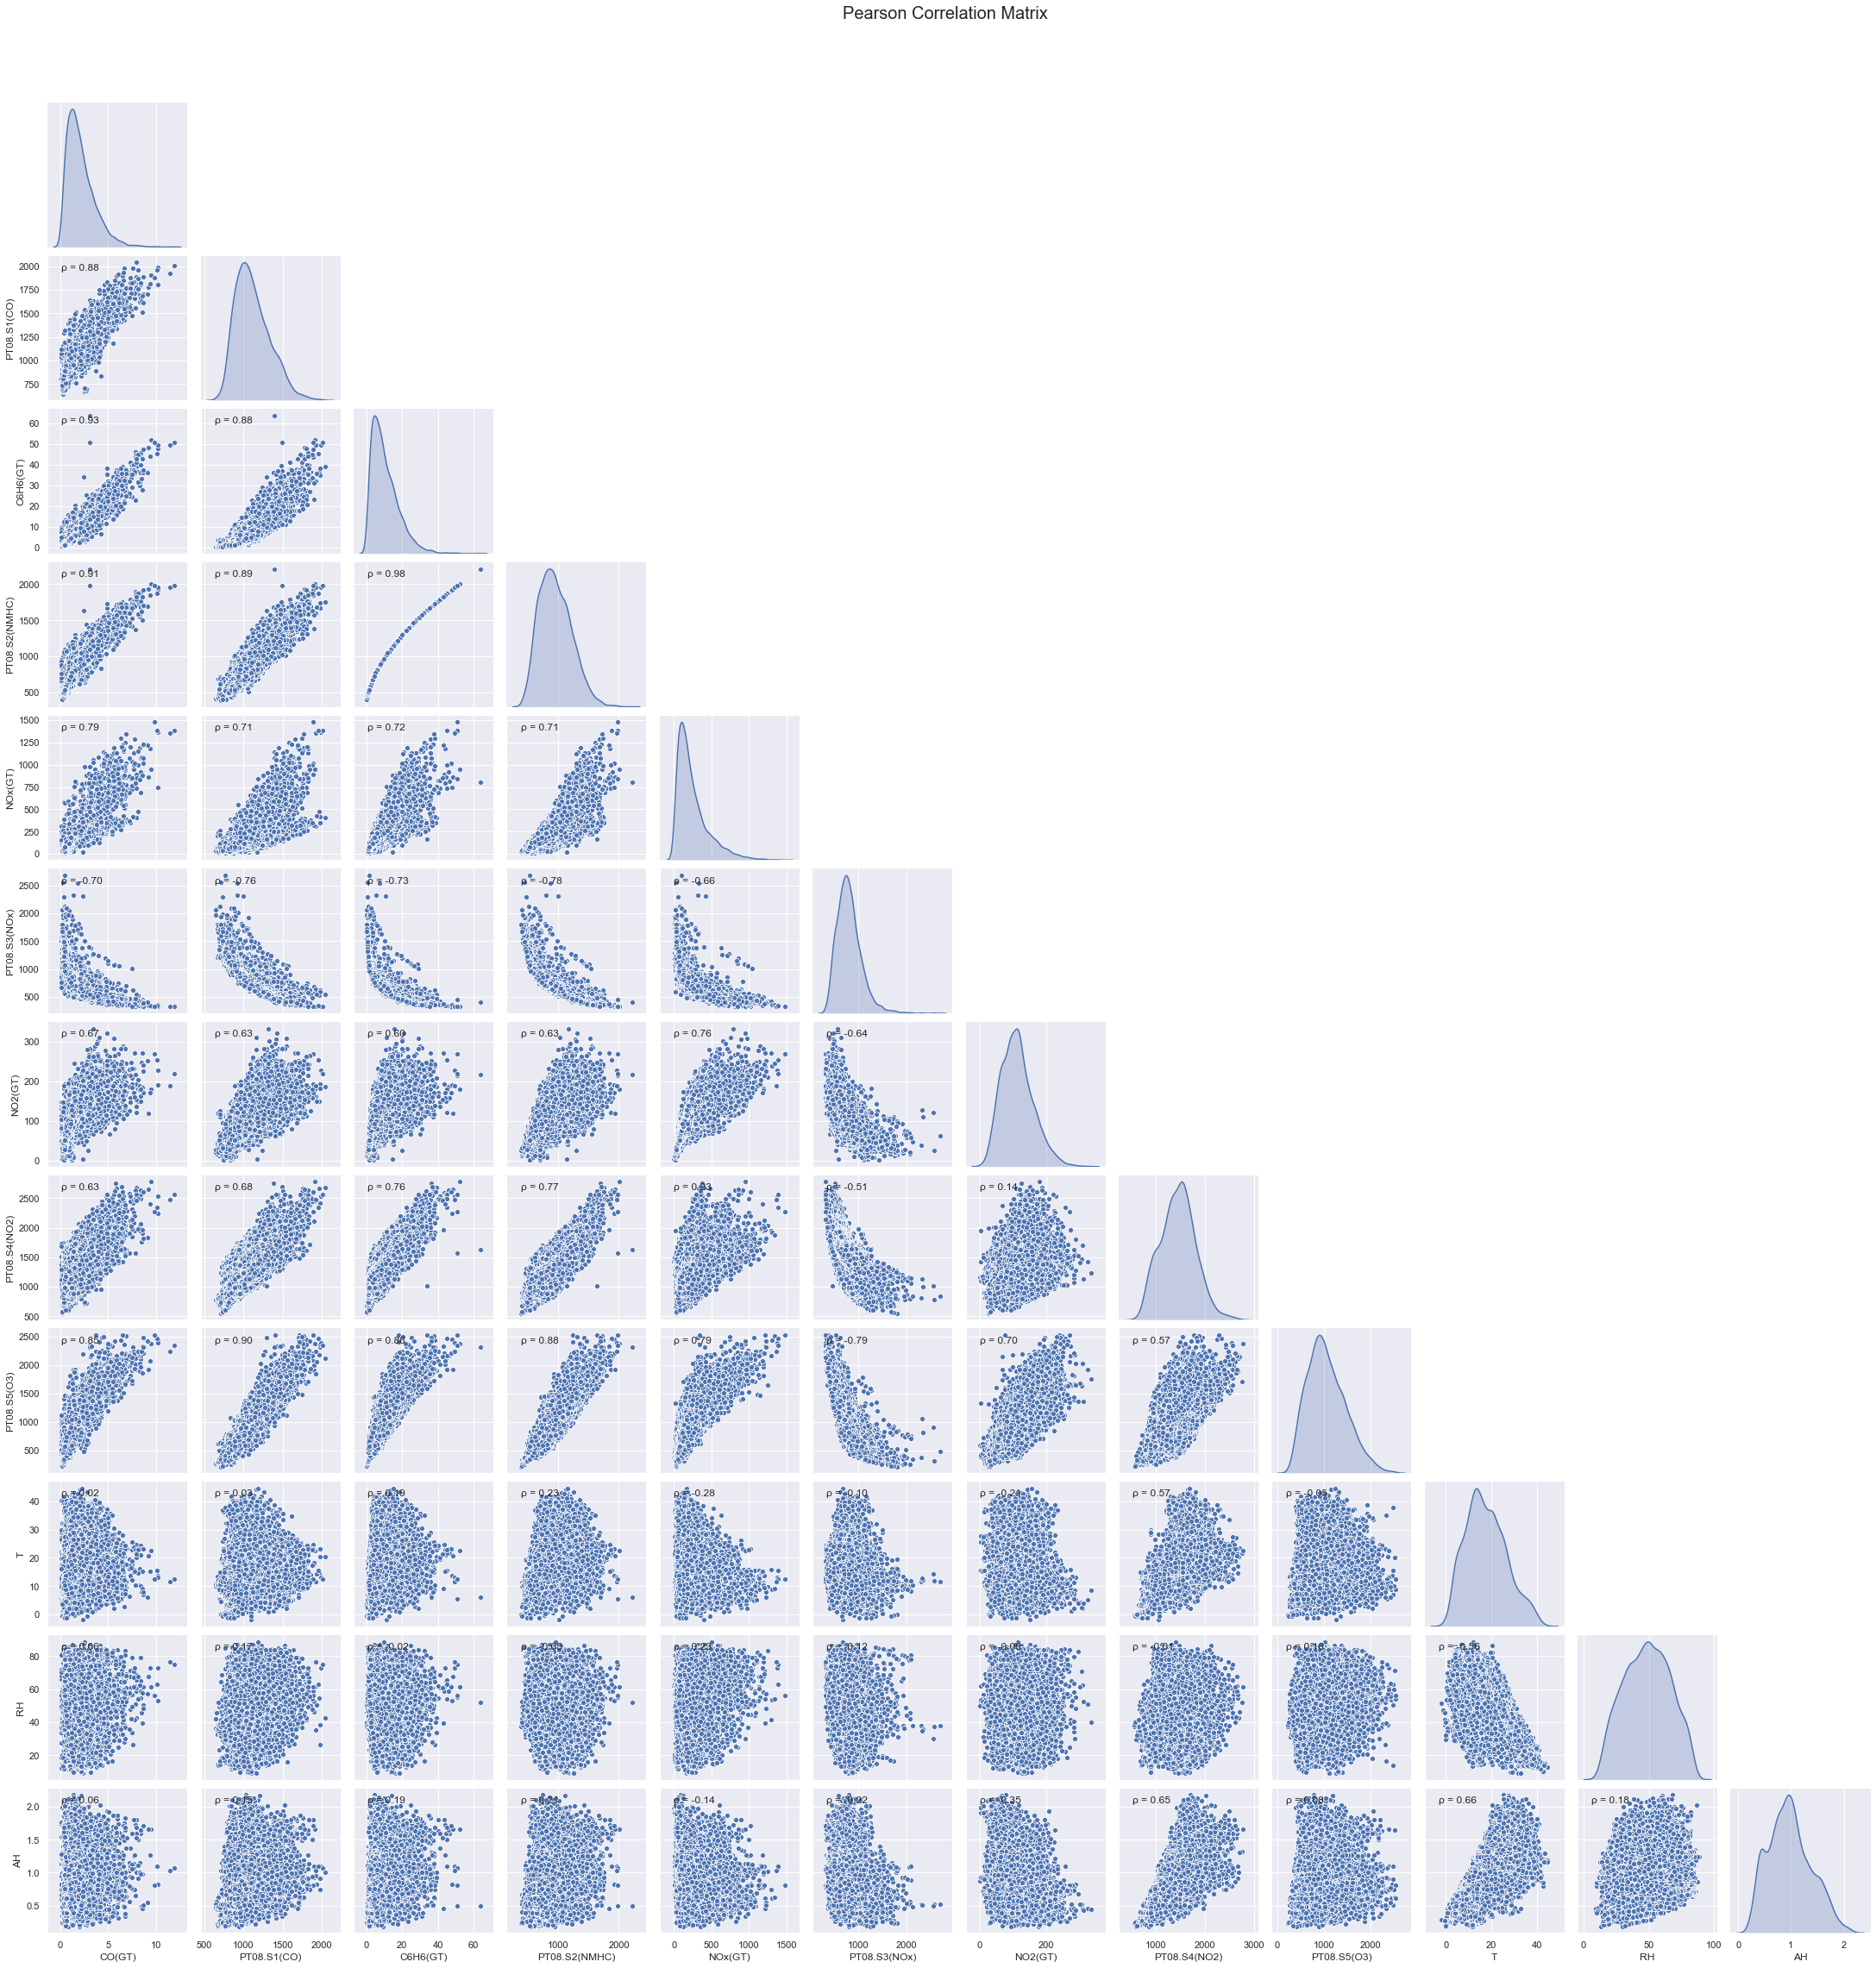

In [18]:
report.correlation()

### PCA plot

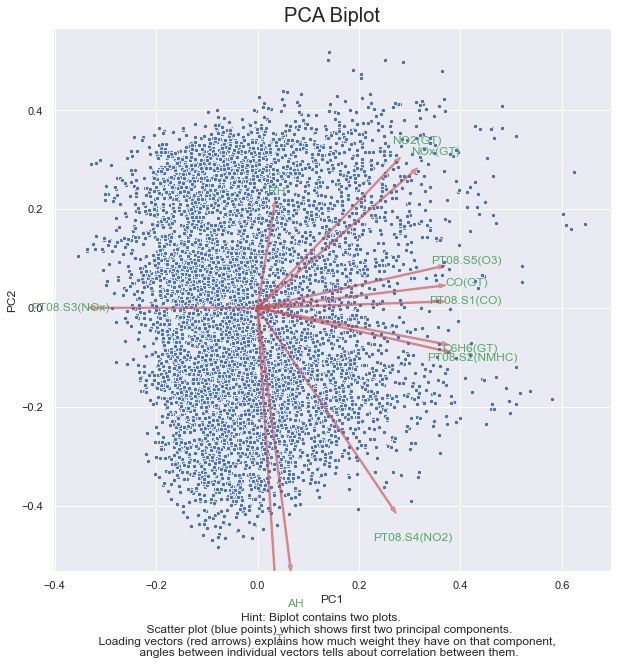

In [19]:
report.pca()

### Boxplots

In [20]:
report.boxplots()

Please specify a categorical column as x-axis using 'target' argument.


### Relative Frequency Plots

In [21]:
report.cat_plots()

Please specify a categorical column as x-axis using 'target' argument


### Timeseries plot 

In [22]:
report.timeseries_plots(grouper = 'M')

### Correspondence Analysis

In [23]:
report.correspondence_analysis()

# plt.savefig("correspondence_analysis.png")

Please specify a categorical column as x-axis using 'target' argument


### Decision Tree Visualizer

In [24]:
report.tree_model(max_depth = 4)

# plt.savefig("tree_model.png")

Please specify a categorical column as x-axis using 'target' argument
